In [1]:
N = 50  
using JLD2
init_random = rand(N, N)
display("init_random:")
display(init_random)

lattice_n = zeros(Int, N, N)
lattice_n[init_random .< 0.75] .= +1
lattice_n[init_random .>= 0.25] .= -1
display("lattice_n:")
display(lattice_n)

lattice_p = zeros(Int, N, N)
lattice_p[init_random .< 0.75] .= -1
lattice_p[init_random .>= 0.25] .= +1
display("lattice_p:")
display(lattice_p)
@save "./../test/lattice.jld2" lattice_n lattice_p

"init_random:"

50×50 Matrix{Float64}:
 0.505626   0.297897    0.195857   …  0.416042   0.840776   0.618585
 0.648764   0.402546    0.675373      0.0311875  0.347659   0.925637
 0.165267   0.82373     0.2146        0.662593   0.927081   0.229059
 0.542213   0.428728    0.420821      0.955081   0.500879   0.690051
 0.744148   0.119661    0.715774      0.49396    0.862391   0.774419
 0.885532   0.938872    0.882886   …  0.64483    0.535523   0.305518
 0.564912   0.936676    0.740004      0.0018818  0.358672   0.877653
 0.0967888  0.807142    0.0490667     0.252077   0.882675   0.600486
 0.345673   0.536911    0.147295      0.972316   0.0432099  0.596195
 0.464111   0.275267    0.872459      0.141793   0.256387   0.580176
 ⋮                                 ⋱                        
 0.706129   0.00758655  0.158606      0.332623   0.759626   0.030417
 0.862967   0.678781    0.972249      0.35012    0.513774   0.0606443
 0.361611   0.950593    0.899271      0.230266   0.464616   0.391735
 0.311781   0.7595

"lattice_n:"

50×50 Matrix{Int64}:
 -1  -1   1   1  -1  -1  -1  -1   1  …  -1  -1   1  -1   1  -1  -1  -1  -1
 -1  -1  -1  -1   1  -1  -1   1   1     -1  -1  -1  -1   1  -1   1  -1  -1
  1  -1   1   1   1  -1  -1   1  -1     -1  -1  -1  -1   1  -1  -1  -1   1
 -1  -1  -1  -1  -1  -1  -1  -1   1     -1  -1  -1  -1  -1  -1  -1  -1  -1
 -1   1  -1  -1  -1  -1  -1  -1  -1     -1  -1  -1   1  -1  -1  -1  -1  -1
 -1  -1  -1  -1   1  -1  -1  -1  -1  …  -1   1  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1   1  -1   1  -1  -1     -1  -1  -1  -1   1  -1   1  -1  -1
  1  -1   1  -1  -1  -1  -1   1  -1     -1  -1   1  -1   1   1  -1  -1  -1
 -1  -1   1  -1  -1  -1  -1  -1   1     -1  -1  -1  -1   1  -1  -1   1  -1
 -1  -1  -1   1  -1  -1  -1  -1  -1     -1  -1   1  -1  -1  -1   1  -1  -1
  ⋮                   ⋮              ⋱                   ⋮              
 -1   1   1  -1  -1   1  -1  -1  -1     -1  -1  -1  -1  -1  -1  -1  -1   1
 -1  -1  -1  -1  -1  -1   1   1  -1     -1  -1  -1  -1  -1  -1  -1  -1   1
 -1  -

"lattice_p:"

50×50 Matrix{Int64}:
  1   1  -1  -1   1   1   1   1  -1  …   1   1  -1   1  -1   1   1   1   1
  1   1   1   1  -1   1   1  -1  -1      1   1   1   1  -1   1  -1   1   1
 -1   1  -1  -1  -1   1   1  -1   1      1   1   1   1  -1   1   1   1  -1
  1   1   1   1   1   1   1   1  -1      1   1   1   1   1   1   1   1   1
  1  -1   1   1   1   1   1   1   1      1   1   1  -1   1   1   1   1   1
  1   1   1   1  -1   1   1   1   1  …   1  -1   1   1   1   1   1   1   1
  1   1   1   1  -1   1  -1   1   1      1   1   1   1  -1   1  -1   1   1
 -1   1  -1   1   1   1   1  -1   1      1   1  -1   1  -1  -1   1   1   1
  1   1  -1   1   1   1   1   1  -1      1   1   1   1  -1   1   1  -1   1
  1   1   1  -1   1   1   1   1   1      1   1  -1   1   1   1  -1   1   1
  ⋮                   ⋮              ⋱                   ⋮              
  1  -1  -1   1   1  -1   1   1   1      1   1   1   1   1   1   1   1  -1
  1   1   1   1   1   1  -1  -1   1      1   1   1   1   1   1   1   1  -1
  1   

In [4]:

using Pkg
Pkg.add("Plots")
using Plots

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


    Updating `~/workspace/MonteCarlo_ising/Project.toml`
  [10745b16] ~ Statistics ⇒ v1.9.0
    Updating `~/workspace/MonteCarlo_ising/Manifest.toml`
 

 [8bb1440f] + DelimitedFiles v1.9.1
  [0dad84c5] ~ ArgTools ⇒ v1.1.1
  [f43a241f] ~ Downloads ⇒ v1.6.0
  [7b1f6079] + FileWatching
  [b27032c2] ~ LibCURL ⇒ v0.6.3
  [ca575930] ~ NetworkOptions ⇒ v1.2.0
  [44cfe95a] ~ Pkg ⇒ v1.9.2
  [ea8e919c] ~ SHA ⇒ v0.7.0
  [10745b16] ~ Statistics ⇒ v1.9.0
  [fa267f1f] ~ TOML ⇒ v1.0.3
  [a4e569a6] ~ Tar ⇒ v1.10.0
  [e66e0078] ~ CompilerSupportLibraries_jll ⇒ v1.0.5+0
  [deac9b47] ~ LibCURL_jll ⇒ v7.84.0+0
  [29816b5a] ~ LibSSH2_jll ⇒ v1.10.2+0
  [c8ffd9c3] ~ MbedTLS_jll ⇒ v2.28.2+0
  [14a3606d] ~ MozillaCACerts_jll ⇒ v2022.10.11
  [4536629a] ~ OpenBLAS_jll ⇒ v0.3.21+4
  [05823500] ~ OpenLibm_jll ⇒ v0.8.1+0
  [efcefdf7] ~ PCRE2_jll ⇒ v10.42.0+0
  [bea87d4a] + SuiteSparse_jll v5.10.1+6
  [83775a58] ~ Zlib_jll ⇒ v1.2.13+0
  [8e850b90] ~ libblastrampoline_jll ⇒ v5.8.0+0
  [8e850ede] ~ nghttp2_jll ⇒ v1.48.0+0
  [3f19e933] ~ p7zip_jll ⇒ v17.4.0+0


Precompiling project...


  ✓ BitFlags
  ✓ TranscodingStreams → TestExt


  ✓ ConcurrentUtilities
  ✓ ZipFile
  ✓ LaTeXStrings


  ✓ MbedTLS


  ✓ CodecZlib


  ✓ NPZ


  ✓ OpenSSL


  ✓ Latexify


  ✓ HTTP


  ✓ GR


  ✓ JLD2


  ✓ Unitful


  ✓ UnitfulLatexify


  ✓ Plots


  ✓ MonteCarlo_ising


  ✓ Plots → FileIOExt


  ✓ Plots → UnitfulExt
  19 dependencies successfully precompiled in 177 seconds. 135 already precompiled.
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version


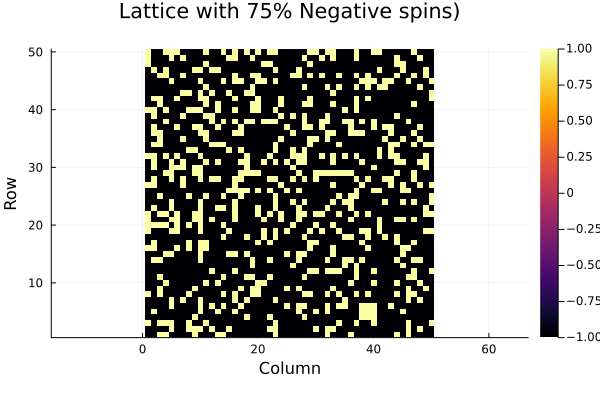

In [5]:
heatmap(lattice_n, xlabel="Column", ylabel="Row", title="Lattice with 75% Negative spins)", aspect_ratio=1)

In [6]:
function energy_manual(lattice,J::Float64)
    energy = 0

    for i in 1:N
        for j in 1:N
            # periodic boundary conditions
            i_p1 = i == N ? 1 : i + 1
            j_m1 = j == 1 ? N : j - 1
            i_m1 = i == 1 ? N : i - 1
            j_p1 = j == N ? 1 : j + 1

            energy += J*(-lattice[i, j] * (lattice[i_p1, j] + lattice[i, j_m1] + lattice[i_m1, j] + lattice[i, j_p1]))/2
        end
    end

    return energy
end


energy_manual (generic function with 1 method)

In [8]:
energy_manual(lattice_n, 1.0)

-1272.0

# Algorithm
1. choose the current state $\mu$

2. pick a random particle on the lattice and flip the spin sign. call the state $\nu$
we will calculate the probability $P(\mu --> \nu)$ to decide that we will accept the new statte or not.

3. If $E_{\nu}> E_{\mu}$ , then set the $P(\nu-->\mu)$=1 and using the detailed balance algorithm , $P(\mu-->\nu)=e^{-\beta(E_{\nu}-E_{\mu})}$
    if $E_{\nu}< E_{\mu}$, thenset $P(\mu-->\nu)$=1, which still satifies the detailed balalnce.
4. Change to state $\nu$ (i.e you flipped the spin of the particale) with the probbality outlined in 3.
5. Go back to step 1. Repeat the whole process many times untill the state reaches the equilibrium. 

In [9]:
function metropolis(spin_array, times, Bj, energy)
    spin_array = copy(spin_array)
    net_spin = zeros(times - 1)
    net_energy = zeros(times - 1)

    for t in 1:times - 1
        # choosing random spin and flipping it
        x = rand(1:N)
        y = rand(1:N)
        spin_i = spin_array[x, y]  # initial spin
        spin_f = -spin_i  # proposed final spin

        # calculating energy difference
        E_i = 0
        E_f = 0

        # periodic boundary conditions
        E_i += -spin_i * spin_array[mod1(x - 1, N), y]
        E_f += -spin_f * spin_array[mod1(x - 1, N), y]

        E_i += -spin_i * spin_array[mod1(x + 1, N), y]
        E_f += -spin_f * spin_array[mod1(x + 1, N), y]

        E_i += -spin_i * spin_array[x, mod1(y - 1, N)]
        E_f += -spin_f * spin_array[x, mod1(y - 1, N)]

        E_i += -spin_i * spin_array[x, mod1(y + 1, N)]
        E_f += -spin_f * spin_array[x, mod1(y + 1, N)]

        # changing state with probability
        delta_E = E_f - E_i

        if delta_E <= 0 || rand() < exp(-Bj * delta_E)
            spin_array[x, y] = spin_f
            energy += delta_E
        end

        net_spin[t] = sum(spin_array)
        net_energy[t] = energy
    end

    return net_spin, net_energy
end


metropolis (generic function with 1 method)

In [11]:
spins,energies=metropolis(lattice_n,100000,0.86,energy_manual(lattice_n,1.0))
# display(spins)
# plot(spins)

([-1264.0, -1264.0, -1264.0, -1264.0, -1264.0, -1264.0, -1266.0, -1266.0, -1266.0, -1266.0  …  -2488.0, -2488.0, -2488.0, -2488.0, -2488.0, -2488.0, -2488.0, -2488.0, -2488.0, -2488.0], [-1272.0, -1272.0, -1272.0, -1272.0, -1272.0, -1272.0, -1272.0, -1272.0, -1272.0, -1272.0  …  -4968.0, -4968.0, -4968.0, -4968.0, -4968.0, -4968.0, -4968.0, -4968.0, -4968.0, -4968.0])

In [12]:


plot_spins = plot(spins / N^2, xlabel="Time steps", ylabel="Average spin, \$\\bar{m}\$", grid=true)
savefig("./metropolis_plot_spin.png")
plot_energies = plot(energies, xlabel="Time steps", ylabel="Energy, \$E\$", grid=true)
savefig("./metropolis_plot_E.png")
plot_layout = hcat(plot_spins, plot_energies)
gr()
plot_layout



1×2 Matrix{Plots.Plot{Plots.GRBackend}}:
 Plot{Plots.GRBackend() n=1}  Plot{Plots.GRBackend() n=1}

![Energy vs Time step](/home/arnabbachhar/workspace/courses/course/metropolis_plot_E.png)
![AVerage spin vs Time step](/home/arnabbachhar/workspace/courses/course/metropolis_plot_spin.png)


In [13]:
using LinearAlgebra
using Statistics
function get_spin_energy(lattice, Bjs)
    ms = zeros(length(Bjs))
    E_mean = zeros(length(Bjs))
    E_stds = zeros(length(Bjs))

    for (j, bj) in enumerate(Bjs)
        spins, energies = metropolis(copy(lattice), 100000, bj, energy_manual(lattice,1.0))
        ms[j] = mean(spins[10001:end]) / N^2
        E_mean[j] = mean(energies[10001:end])
        E_stds[j] = std(energies[10001:end])
    end

    return ms, E_mean, E_stds
end

Bjs = range(0.1, stop=1.0, length=10)
ms_n, E_mean_n, E_stds_n = get_spin_energy(copy(lattice_n), Bjs)
ms_p, E_mean_p, E_stds_p = get_spin_energy(copy(lattice_p), Bjs)


([0.002480863120701341, 0.010840280447560528, 0.007791686574295269, 0.5225744819386883, 0.8851508127868088, 0.9308230447004967, 0.9827171768575207, 0.9776186224291381, 0.9917935710396781, 0.9935196524405826], [-503.24345826064734, -1062.6999411104568, -1798.1070456338405, -3011.385193168813, -4258.965677396415, -4615.2799919999115, -4869.118056867299, -4883.63550706119, -4953.370770786342, -4961.882332025912], [68.01060141787221, 73.94084049694163, 74.56855024142654, 105.33536182568504, 182.90783992471572, 192.78376310837174, 109.00548391081729, 136.3610292908846, 78.2193899870792, 82.86563389827849])

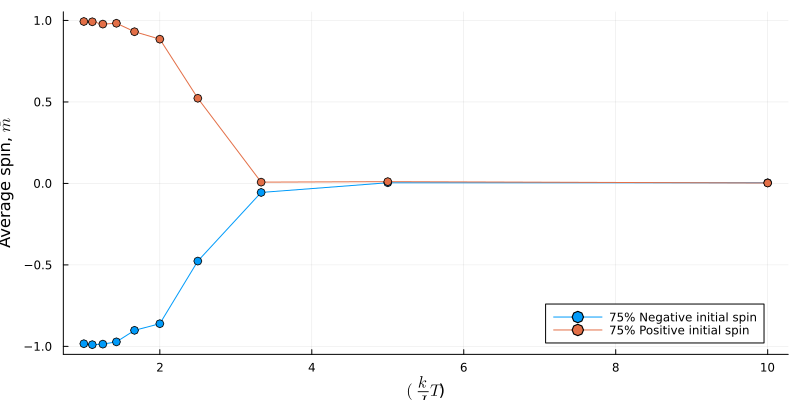

In [14]:
Bjs = range(0.1, stop=1.0, length=10)

plt = plot(size=(800, 400), legend=:bottomright, xlabel="\$(\\frac{k}{J}T\$)", ylabel="Average spin, \$\\bar{m}\$")

plot!(1 ./ Bjs, ms_n, marker=:o, label="75% Negative initial spin")
plot!(1 ./ Bjs, ms_p, marker=:o, label="75% Positive initial spin")

display(plt)

# Heat Capacity
Heat capacity, $C_v=\frac{\sigma^2_E}{T^2}$
=$(<E^2>-<E>^2).\beta^2k^2$=$\sigma_{E/J}^2.(\beta J)^2
k^2$

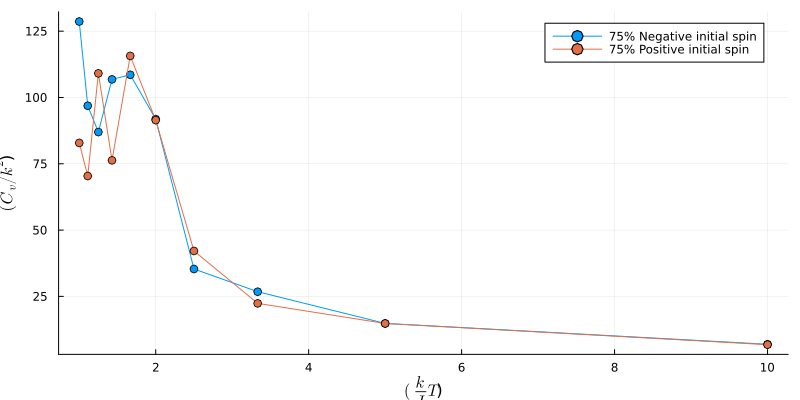

In [15]:
plt = plot(size=(800, 400), legend=:topright, xlabel="\$(\\frac{k}{J}T\$)", ylabel="\$(C_v/k^2\$)")

plot!(1 ./ Bjs, E_stds_n .* Bjs, marker=:o, label="75% Negative initial spin")
plot!(1 ./ Bjs, E_stds_p .* Bjs, marker=:o, label="75% Positive initial spin")

display(plt)

In [23]:
Ns = [100, 90,80, 70, 60, 50]
include("./../src/Ising_model.jl")
include("./../src/metropolis.jl")

using Plots
plt = plot(size=(800, 400), legend=:topright, xlabel="Time steps", ylabel="Average spin, \$\\bar{m}\$", grid=false)
J=0.8
for N in Ns
    lattice_n= IsingModel(N,J,false)
    spin_per_site,energies,spins=metropolis(lattice_n,100000,0.86,energy_manual(lattice_n))
    plot!(spins / N^2, xlabel="Time steps", ylabel="Average spin, \$\\bar{m}\$", grid=true,label="N=$N")
end
savefig("./metropolis_plot_negative_spin_N.png")

"/home/arnabbachhar/workspace/MonteCarlo_ising/example/metropolis_plot_negative_spin_N.png"

![Energy vs Time step](/home/arnabbachhar/workspace/courses/course/metropolis_plot_negative_spin_N.png)

In [4]:
Ns = [100, 90,80, 70, 60, 50]
plt = plot(size=(800, 400), legend=:topright, xlabel="Time steps", ylabel="Energy per site", grid=false)
for N in Ns
    lattice_n= IsingModel(N, 0.7,false)
    spin_per_site,energies,spins=metropolis(lattice_n,100000,0.86,energy_manual(lattice_n))
    plot!(energies/ N^2, xlabel="Time steps", ylabel="Energy per site", grid=true,label="N=$N")
end
savefig("./metropolis_plot_energy_N.png")

"/home/arnabbachhar/workspace/courses/course/metropolis_plot_energy_N.png"

![Energy vs Time step](/home/arnabbachhar/workspace/courses/course/metropolis_plot_energy_N.png)

In [6]:
Ns = [100, 90,80, 70, 60, 50]
plt = plot(size=(800, 400), legend=:topright, xlabel="Time steps", ylabel="Average spin, \$\\bar{m}\$", grid=false)
for N in Ns
    lattice_p= IsingModel(N, 0.7,true)
    spin_per_site,energies,spins=metropolis(lattice_p,100000,0.86,energy_manual(lattice_p))
    plot!(spins / N^2, xlabel="Time steps", ylabel="Average spin, \$\\bar{m}\$", grid=true,label="N=$N")
end
savefig("./metropolis_plot_positive_spin_N.png")

"/home/arnabbachhar/workspace/courses/course/metropolis_plot_positive_spin_N.png"

![Energy vs Time step](/home/arnabbachhar/workspace/courses/course/metropolis_plot_positive_spin_N.png)

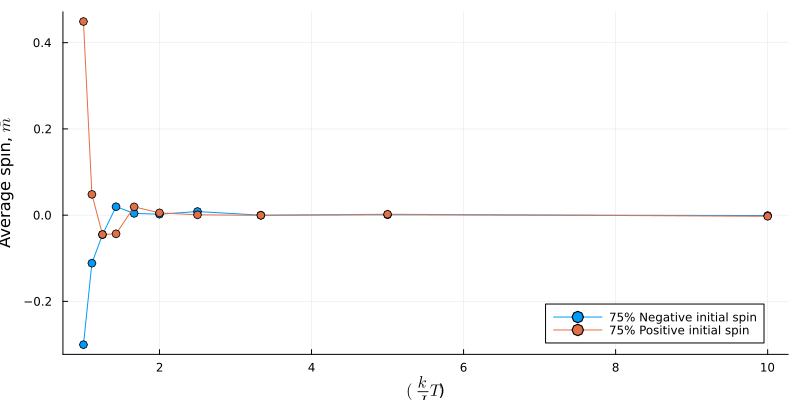

In [9]:
Bjs = range(0.1, stop=1.0, length=10)
J=0.4
lattice_n= IsingModel(50,J, false)
lattice_p= IsingModel(50, J,true)
skiped_points=75000
total_points=200000
ms_n, E_mean_n, E_stds_n = get_spin_energy((lattice_n), Bjs,skiped_points,total_points)
ms_p, E_mean_p, E_stds_p = get_spin_energy((lattice_p), Bjs,skiped_points,total_points)

plt = plot(size=(800, 400), legend=:bottomright, xlabel="\$(\\frac{k}{J}T\$)", ylabel="Average spin, \$\\bar{m}\$")

plot!(1 ./ Bjs, ms_n, marker=:o, label="75% Negative initial spin")
plot!(1 ./ Bjs, ms_p, marker=:o, label="75% Positive initial spin")

display(plt)




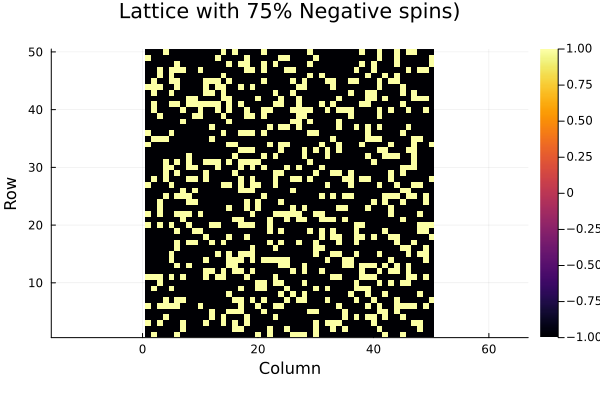

In [16]:
Bjs = range(0.1, stop=1.0, length=10)
J=0.7
lattice_n= IsingModel(50,J, false)
heatmap(lattice_n.lattice, xlabel="Column", ylabel="Row", title="Lattice with 75% Negative spins)", aspect_ratio=1)


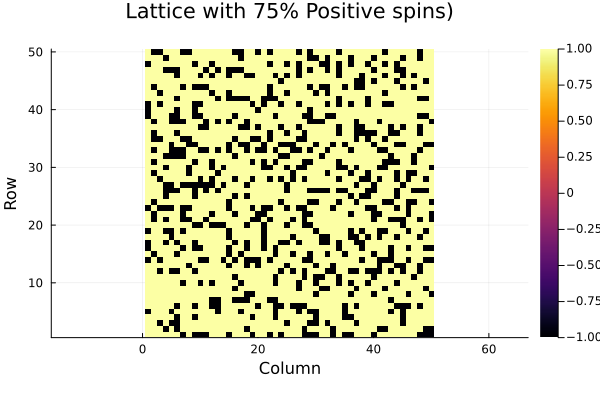

In [15]:
lattice_p= IsingModel(50, J,true)
heatmap(lattice_p.lattice, xlabel="Column", ylabel="Row", title="Lattice with 75% Positive spins)", aspect_ratio=1)


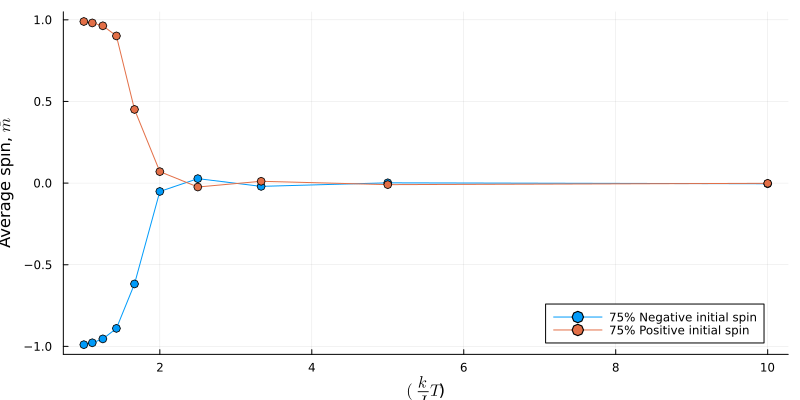

In [17]:
skiped_points=75000
total_points=200000
ms_n, E_mean_n, E_stds_n = get_spin_energy((lattice_n), Bjs,skiped_points,total_points)
ms_p, E_mean_p, E_stds_p = get_spin_energy((lattice_p), Bjs,skiped_points,total_points)

plt = plot(size=(800, 400), legend=:bottomright, xlabel="\$(\\frac{k}{J}T\$)", ylabel="Average spin, \$\\bar{m}\$")

plot!(1 ./ Bjs, ms_n, marker=:o, label="75% Negative initial spin")
plot!(1 ./ Bjs, ms_p, marker=:o, label="75% Positive initial spin")

display(plt)

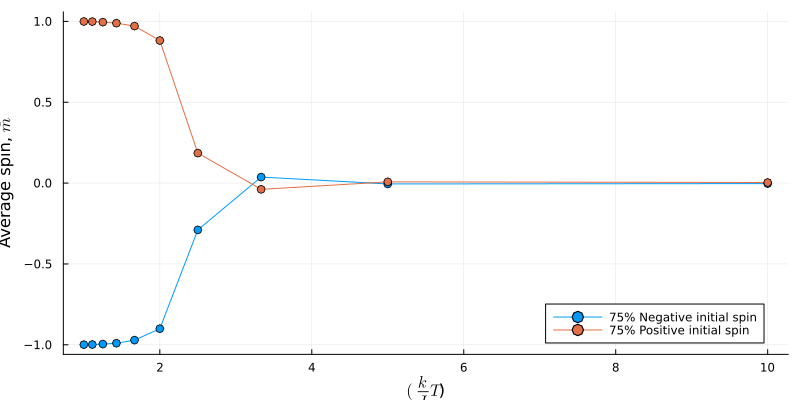

In [11]:
Bjs = range(0.1, stop=1.0, length=10)
J=0.98
lattice_n= IsingModel(50,J, false)
lattice_p= IsingModel(50, J,true)
skiped_points=75000
total_points=200000
ms_n, E_mean_n, E_stds_n = get_spin_energy((lattice_n), Bjs,skiped_points,total_points)
ms_p, E_mean_p, E_stds_p = get_spin_energy((lattice_p), Bjs,skiped_points,total_points)

plt = plot(size=(800, 400), legend=:bottomright, xlabel="\$(\\frac{k}{J}T\$)", ylabel="Average spin, \$\\bar{m}\$")

plot!(1 ./ Bjs, ms_n, marker=:o, label="75% Negative initial spin")
plot!(1 ./ Bjs, ms_p, marker=:o, label="75% Positive initial spin")

display(plt)

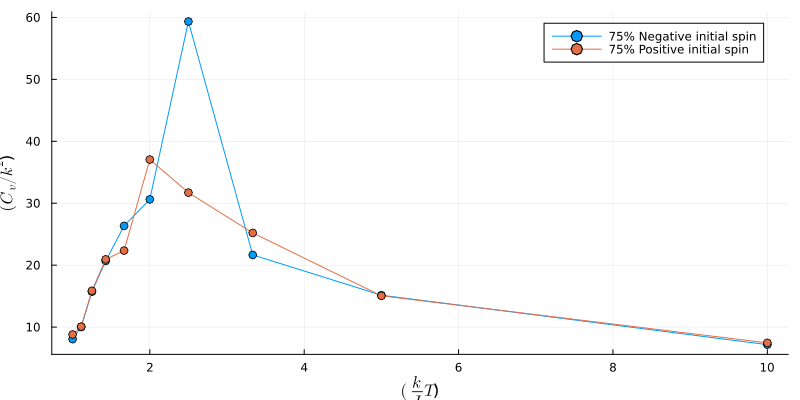

In [12]:
plt = plot(size=(800, 400), legend=:topright, xlabel="\$(\\frac{k}{J}T\$)", ylabel="\$(C_v/k^2\$)")

plot!(1 ./ Bjs, E_stds_n .* Bjs, marker=:o, label="75% Negative initial spin")
plot!(1 ./ Bjs, E_stds_p .* Bjs, marker=:s, label="75% Positive initial spin")

display(plt)

In [14]:
using Plots
Ns = [150,120,100,80,  60, 50]
temperatures = [1.6, 2.0, 2.16, 2.34, 2.43, 2.76, 3.35,3.5,3.7,4.0,4.2,4.5]
T_by_Tc=temperatures./2.269
skipped_points = 10000
total_points = 200000
plt = plot(size=(800, 400), legend=:topright, xlabel="T/Tc", ylabel="Magnetic susceptibility, \$\\chi\$", grid=false)
include("./../src/Ising_model.jl")
include("./../src/metropolis.jl")
include("./../src/properties.jl")

for N in Ns
    chi_values = Float64[]
    for temperature in temperatures
        spin_array = IsingModel(N)
        chi = magnetic_susceptibility(spin_array, skipped_points, total_points, temperature)
        push!(chi_values, chi)
    end
    println(chi_values)
    println(T_by_Tc)

    plot!(T_by_Tc, chi_values, label="N=$N",linewidth=3,marker=:auto)
end
savefig("./magnetic_susceptibility.png")

[149.42165381998817, 57.511210221074045, 33.41621152262661, 3075.7548867604332, 2763.7050027321243, 1510.3150413475719, 554.5570706786069, 393.6379474430075, 307.06442725512886, 206.0961857188304, 180.7452355878585, 122.78820610328785]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


[85.44631477945453, 46.52927266033417, 26.38143761336605, 2301.1297155782977, 1698.1115411330106, 638.0781765197263, 255.71157054551804, 145.0727885417711, 126.86789775169908, 70.43239171673977, 58.44943503585352, 41.36486436257311]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


[46.58985751583438, 34.604002514821985, 13.081148875287276, 1455.0677483625734, 1170.510608443578, 461.4000280976354, 106.6884920873527, 65.38559235007519, 41.37731427766714, 24.13636039, 24.585489401503754, 15.103163694502927]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


[17.480210298918664, 17.335195698207784, 6.406010931736703, 1231.242365654521, 724.9399899731969, 215.03846340460532, 38.57505890023566, 25.170660710526313, 17.53798665896159, 8.307963791940788, 8.16421740914787, 4.512221402046784]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


[6.495722356518685, 9.378858232444198, 3.0633534945428975, 477.09386251811867, 380.45111352970906, 68.18956375964065, 7.0711057187745485, 9.391866055137845, 6.106494028765609, 1.7316993304093569, 2.044289086605402, 1.3544287628330087]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


[3.3507774137180033, 3.3779867830389945, 4.663791172244147, 332.7525426468736, 218.5377873077756, 24.512355466056448, 6.901989271327572, 5.006574895639097, 3.4305893325746797, 1.335796837894737, 1.6153695478696743, 0.9002224074853802]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


"/home/arnabbachhar/workspace/MonteCarlo_ising/example/magnetic_susceptibility.png"

![susceptibility vs Temperature](/home/arnabbachhar/workspace/MonteCarlo_ising/example/magnetic_susceptibility.png)

In [25]:
plt = plot(size=(800, 400), legend=:topright, xlabel="T/Tc", ylabel="Magnetization, \$m\$", grid=false)
Ns = [20, 50,70,100,140]
temperatures = [1.4,1.45,1.6,1.7,1.8,1.9, 2.0,2.08, 2.16,2.25, 2.34, 2.43,2.5, 2.76, 3.35]
T_by_Tc=temperatures./2.269
for N in Ns
    ms_values = Float64[]
    for temperature in temperatures
        spin_array = IsingModel(N)
        ms, ms_squared = magnetization(spin_array, skipped_points, total_points, temperature)
        push!(ms_values, ms)
    end
    println(ms_values)
    println(T_by_Tc)

    plot!(T_by_Tc, ms_values, label="N=$N",linewidth=2,marker=:auto)
end
savefig("./magnetization.png")

[0.9913866052631577, 0.988621947368421, 0.9795700789473685, 0.9715365263157895, 0.9572326842105264, 0.9346653947368421, 0.9103289210526315, 0.8842553421052631, 0.8020268684210525, 0.7521289210526315, 0.2435239210526316, 0.40345905263157894, 0.02821907894736842, 0.009999368421052623, 0.02923805263157895]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


[0.9809161852631578, 0.9848525600000003, 0.9532875747368421, 0.945852362105263, 0.9471406315789473, 0.9270800252631579, 0.8656736505263158, 0.8653461347368421, 0.8131602863157894, 0.7072483115789474, 0.6263162273684211, 0.5147806905263158, 0.38179365052631575, 0.17985841263157895, 0.02914505263157895]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


[0.9473498088077337, 0.9633785456498389, 0.9512800021482277, 0.9411785155746509, 0.8968246100966702, 0.8863764747583245, 0.8383232889366273, 0.7909036025778732, 0.7182997336197637, 0.6933847261009667, 0.5568748635875402, 0.44219805585392047, 0.4265068227712137, 0.19933209237379163, 0.11319659076262084]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


[0.9271898873684211, 0.8977339357894737, 0.9065056021052632, 0.8564354063157894, 0.829290532631579, 0.8022645115789473, 0.78460498, 0.7049557936842105, 0.6507870484210526, 0.6689265936842106, 0.57217642, 0.5234211747368421, 0.5058768115789474, 0.3296194442105263, 0.1261601842105263]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


[0.8346270762620839, 0.8324929677765844, 0.793073470998926, 0.772256470461869, 0.7720016100966702, 0.7246908796992481, 0.6909154683136411, 0.6788253012889367, 0.64180400698174, 0.5993665477980665, 0.5721166433941998, 0.5251687185821697, 0.4847346503759398, 0.42102821428571435, 0.26237534801288936]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


"/home/arnabbachhar/workspace/MonteCarlo_ising/example/magnetization.png"

![susceptibility vs Temperature](/home/arnabbachhar/workspace/MonteCarlo_ising/example/magnetization.png)